# Parallel beam data

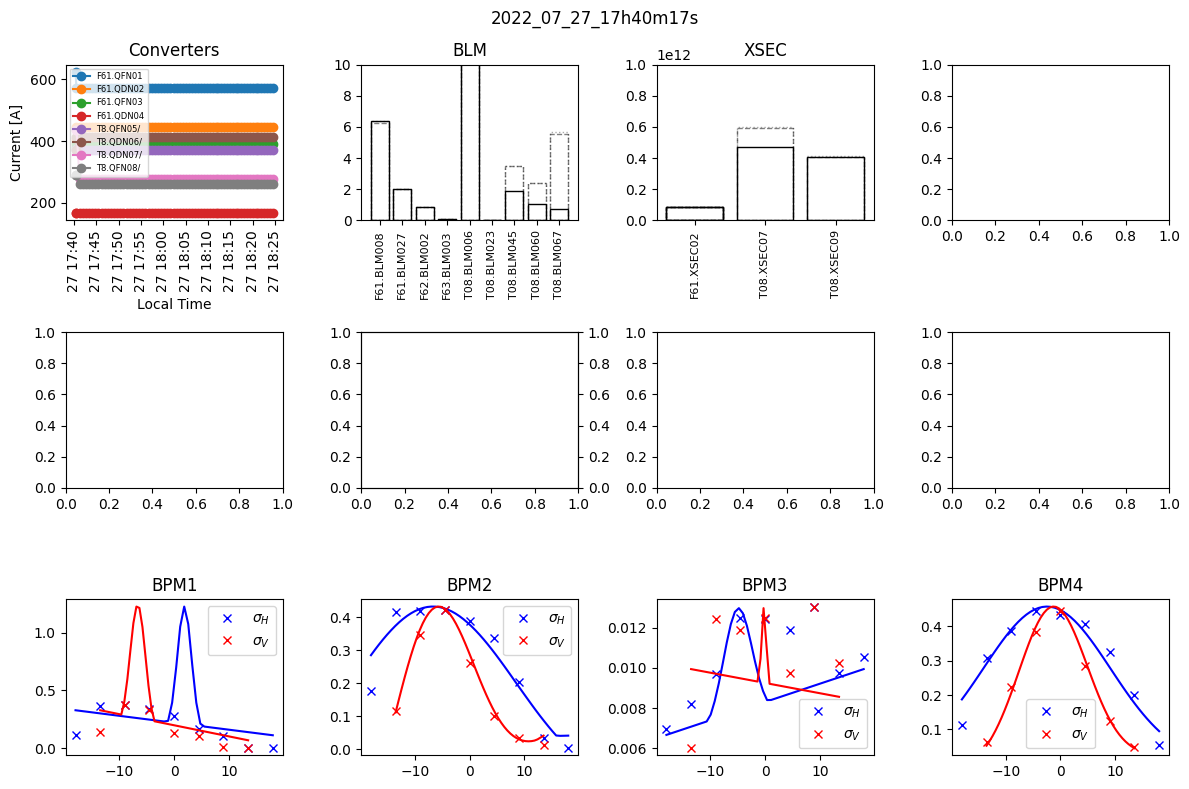


In [1]:
# Run this cell once
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('quad_scan_t8_bpms_2022_07_27_17h40m18s.p', 'rb') as f:
    data = pickle.load(f)

In [4]:
print(f"{len(data[0])} shots of parallel beam where taken")
print("\n")
# The first index is the time of the measurement
print("Date:")
print(data[0][0])
print("\n")

# The seventh index is BPM high level information such as sigma and position of the center of the beam
print("High level information:")
print(data[7]["PS-LOG-BPM-IRRAD-UCAP_BPM_01/Positions"][0])
print("\n")

# Index 8 is the Raw Profiles
print("Raw profile:")
print(data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_01/ProfilesAcquisition"][0]["HRawProfile"])

67 shots of parallel beam where taken


Date:
2022-07-27 17:40:23.462156


High level information:
{'HSigma': 4.803444754518663, 'VCenter': 0.19881954761904763, 'HCenter': 0.36566815277777776, 'Intensity': 0.731532, 'DynDest': 'EAST_T8', 'VSigma': 5.390628339566591, 'DeviceName': 'PS-LOG-BPM-IRRAD-UCAP_BPM_01'}


Raw profile:
[[-1.800000e+01 -1.350000e+01 -9.000000e+00 -4.500000e+00  0.000000e+00
   4.500000e+00  9.000000e+00  1.350000e+01  1.800000e+01]
 [ 2.146000e-03  1.748530e-01  4.234700e-01  6.604460e-01  7.315320e-01
   6.187385e-01  4.060785e-01  2.406210e-01  2.535500e-03]]


# BPM01

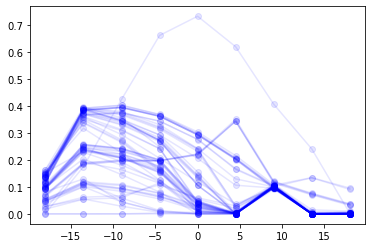

In [5]:
fig, ax = plt.subplots()

for i in range(len(data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_01/ProfilesAcquisition"])):

    x = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_01/ProfilesAcquisition"][i]["HRawProfile"][0]
    y = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_01/ProfilesAcquisition"][i]["HRawProfile"][1]


    ax.plot(x,y, marker="o", color="b", alpha=0.1)

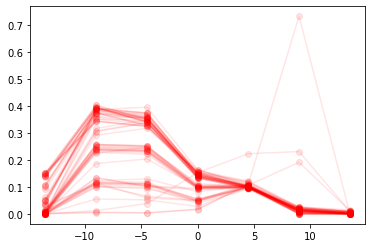

In [6]:
fig, ax = plt.subplots()

for i in range(len(data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_01/ProfilesAcquisition"])):

    x = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_01/ProfilesAcquisition"][i]["VRawProfile"][0]
    y = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_01/ProfilesAcquisition"][i]["VRawProfile"][1]


    ax.plot(x,y, marker="o", color="r", alpha=0.1)

# BPM02

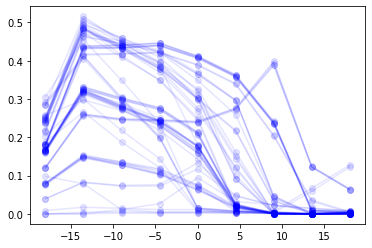

In [7]:
fig, ax = plt.subplots()

for i in range(len(data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_02/ProfilesAcquisition"])):

    x = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_02/ProfilesAcquisition"][i]["HRawProfile"][0]
    y = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_02/ProfilesAcquisition"][i]["HRawProfile"][1]


    ax.plot(x,y, marker="o", color="b", alpha=0.1)

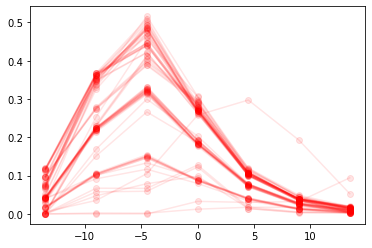

In [8]:
fig, ax = plt.subplots()

for i in range(len(data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_02/ProfilesAcquisition"])):

    x = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_02/ProfilesAcquisition"][i]["VRawProfile"][0]
    y = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_02/ProfilesAcquisition"][i]["VRawProfile"][1]


    ax.plot(x,y, marker="o", color="r", alpha=0.1)

# BPM04

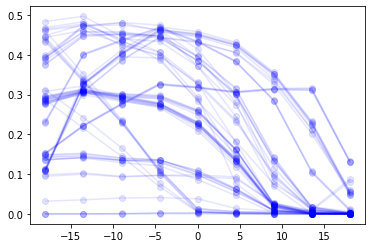

In [9]:
fig, ax = plt.subplots()

for i in range(len(data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_04/ProfilesAcquisition"])):

    x = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_04/ProfilesAcquisition"][i]["HRawProfile"][0]
    y = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_04/ProfilesAcquisition"][i]["HRawProfile"][1]


    ax.plot(x,y, marker="o", color="b", alpha=0.1)

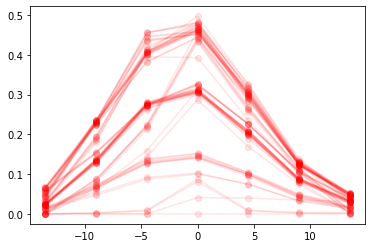

In [10]:
fig, ax = plt.subplots()

for i in range(len(data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_04/ProfilesAcquisition"])):

    x = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_04/ProfilesAcquisition"][i]["VRawProfile"][0]
    y = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_04/ProfilesAcquisition"][i]["VRawProfile"][1]


    ax.plot(x,y, marker="o", color="r", alpha=0.1)

# Example of a gaussian fit

In [11]:
from scipy.optimize import curve_fit

In [12]:
def gaussian_function(x, a, I, mu, sig):
    return a + I / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x - mu) ** 2 / 2. / sig ** 2)

def do_gaussian_fit(x,y):
    mu = np.average(x, weights=np.abs(y - np.min(y)))
    sigma = np.sqrt(np.average(x**2, weights=np.abs(y - np.min(y))) - mu**2)
    p0 = [y.min(), (np.max(y) - np.min(y)) * np.sqrt(2 * np.pi * sigma**2), mu, sigma]
    popt, pcov = curve_fit(gaussian_function, x, y, p0=p0, maxfev=10000) # maxfev is the number of tries it does the fit
    return popt, pcov

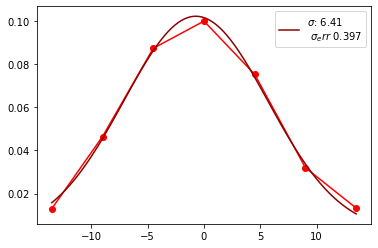

In [13]:
fig, ax = plt.subplots()

i = 2

x = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_04/ProfilesAcquisition"][i]["VRawProfile"][0]
y = data[8]["PS-LOG-BPM-IRRAD-UCAP_BPM_04/ProfilesAcquisition"][i]["VRawProfile"][1]


ax.plot(x,y, marker="o", color="r",)

try:
    Vx = x
    Vy = y
    poptV, pcovV = do_gaussian_fit(Vx, Vy)
    Vx_fine = np.linspace(Vx.min(), Vx.max(), 100)
    ax.plot(Vx_fine, gaussian_function(Vx_fine, poptV[0], poptV[1], poptV[2], poptV[3]), label=f"$\sigma$: {abs(round(poptV[3],2))}\n $\sigma_err$ {round(pcovV[3, 3] ** 0.5,3)}", color="darkred")
except:
    print("fit failed")
    pass

ax.legend()